Implement the Particle Swarm Optimisation algorithm to find the minimum of the following function:
f(x,y) = (1.5 – x -xy)^2 + (2.25 – x + xy^2)^2 + (2.625 – x + xy^3)^2 for x,y in range <-4.5, 4.5>
Test your algorithm using different parameters and analyse the results.


In [1]:
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import math, random
import itertools as it
import matplotlib.pyplot as plt

def fn(x, y):
    #return np.power(2.5 * np.sin(x + y**2) , 2) + np.power(-2.25 * np.sin(y) * np.cos(x) + np.cos(x * y), 3)
    
    return np.power((1.5 - x - x*y), 2) + np.power((2.25 - x + (x * np.power(y, 2))), 2) + np.power((2.625 - x + (x * np.power(y, 3))), 2)
    

[ 2.9474 -1.1246] -21.561763349358785


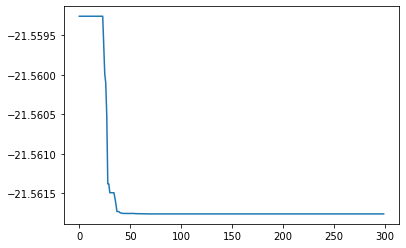

In [8]:
domain = [-4.5, 4.5]
n_particles, iters = 100, 300
phi_p = 0.5 #cognitive - particle's own attraction to personal best
phi_g = 0.5 #social - particle's attraction to population best
omega = 0.75 # inertia
lr = 0.1
dims = 2

np.set_printoptions(precision=4)
particle_pos = np.random.uniform(low = domain[0], high = domain[1], size = (n_particles, 2)) #[x, y] x 100
best_known_pos = particle_pos.copy()
global_best = best_known_pos[np.argmin(fn(best_known_pos[:, 0], best_known_pos[:, 1]))]
velocities = np.random.uniform(low = domain[0], high = domain[1], size = (n_particles, 2))

history = []
for _ in range(iters):
    r_p, r_g = np.random.rand(n_particles, 2), np.random.rand(n_particles, 2)
    # Update the particle's velocity: vi ← ω vi + φp rp (pi-xi) + φg rg (g-xi)
    velocities = omega*velocities + \
                 phi_p*r_p*(best_known_pos-particle_pos) + \
                 phi_g*r_g*(np.broadcast_to(global_best, particle_pos.shape)-particle_pos)
    
    particle_pos = particle_pos + lr * velocities
    particle_pos = np.clip(particle_pos, a_min=(domain[0], domain[0]), a_max = (domain[1], domain[1]))
    
    best_known_pos = np.array([new if fn(*new)<fn(*old) else old for new, old in zip(particle_pos, best_known_pos)])
    global_best = best_known_pos[np.argmin(fn(best_known_pos[:, 0], best_known_pos[:, 1]))]
    history.append(fn(*global_best))

plt.plot(history)
print(global_best, fn(*global_best))

In [9]:
x = np.arange(domain[0], domain[1], 0.1)
y = np.arange(domain[0], domain[1], 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = fn(xx, yy)
fig = go.Figure(data =
    go.Contour(x = x, y = y, z = z)
)
fig.add_annotation(x=global_best[0], y=global_best[1],
            text=f"p = ({global_best[0]:.2f},{global_best[1]:.2f}) | f(p) = {fn(*global_best):.5f}",
            showarrow=True,
            bgcolor='white',
            arrowhead=2,
            arrowcolor='#ffffff')
fig.show()